In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

from sklearn.neighbors import KNeighborsClassifier, NearestCentroid

from modules.categorical_data_coding import code_data
from modules.model_runer import find_n_neighbors, test_model
from modules.classes_scatterplot import draw_classes_scatterplot

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./prepared_datasets/0_Ca_classification.csv')
df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_4991,f_4992,f_4993,f_4994,f_4995,f_4996,f_4997,f_4998,f_4999,target
0,12.635397,13.077894,13.062591,12.894789,12.650586,12.711683,12.360680,12.925277,13.398274,13.535571,...,13.231437,13.399334,13.155131,13.643429,13.521326,13.353523,13.704420,14.391117,13.735014,0Ca/0Que
1,12.651611,13.124609,13.612906,13.597603,13.216200,13.444997,13.246694,12.010691,12.575289,12.865186,...,12.774651,13.583349,13.018846,12.622043,13.003540,13.232437,12.988234,13.064531,12.866229,0Ca/0Que
2,12.942526,13.339223,12.881420,12.606817,12.957714,12.957711,12.789909,12.469406,13.049303,13.095100,...,13.462266,13.447063,12.897760,12.897757,13.569054,12.897751,12.745149,12.928246,13.035043,0Ca/0Que
3,12.912940,13.035037,12.638334,12.577231,12.592529,13.248626,13.111323,13.065520,13.660617,13.660614,...,13.371680,13.432777,13.631074,13.585371,13.035969,12.730866,13.570063,14.592360,14.104157,0Ca/0Que
4,13.310654,13.371651,13.997249,14.210946,13.798943,13.936240,13.539537,13.646334,13.463231,13.264829,...,13.494794,13.250591,12.930189,12.701286,12.518183,13.036980,13.632077,13.235374,13.143771,0Ca/0Que


In [4]:
list(df.target.unique())

['0Ca/0Que', '0Ca/10Que', '0Ca/100Que']

In [5]:
code_data(df, 'target')
df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_4991,f_4992,f_4993,f_4994,f_4995,f_4996,f_4997,f_4998,f_4999,target
0,12.635397,13.077894,13.062591,12.894789,12.650586,12.711683,12.360680,12.925277,13.398274,13.535571,...,13.231437,13.399334,13.155131,13.643429,13.521326,13.353523,13.704420,14.391117,13.735014,0
1,12.651611,13.124609,13.612906,13.597603,13.216200,13.444997,13.246694,12.010691,12.575289,12.865186,...,12.774651,13.583349,13.018846,12.622043,13.003540,13.232437,12.988234,13.064531,12.866229,0
2,12.942526,13.339223,12.881420,12.606817,12.957714,12.957711,12.789909,12.469406,13.049303,13.095100,...,13.462266,13.447063,12.897760,12.897757,13.569054,12.897751,12.745149,12.928246,13.035043,0
3,12.912940,13.035037,12.638334,12.577231,12.592529,13.248626,13.111323,13.065520,13.660617,13.660614,...,13.371680,13.432777,13.631074,13.585371,13.035969,12.730866,13.570063,14.592360,14.104157,0
4,13.310654,13.371651,13.997249,14.210946,13.798943,13.936240,13.539537,13.646334,13.463231,13.264829,...,13.494794,13.250591,12.930189,12.701286,12.518183,13.036980,13.632077,13.235374,13.143771,0


# Distance-based algorithms

In [6]:
scaler = MinMaxScaler()

In [7]:
distance_based_df = scaler.fit_transform(df.values)
distance_based_df = pd.DataFrame(distance_based_df)
distance_based_df.columns = df.columns
distance_based_df

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_4991,f_4992,f_4993,f_4994,f_4995,f_4996,f_4997,f_4998,f_4999,target
0,0.249887,0.258786,0.261638,0.252602,0.259822,0.254393,0.242145,0.260619,0.264731,0.283634,...,0.270910,0.272927,0.264695,0.278022,0.268443,0.259198,0.281751,0.298127,0.288125,0.0
1,0.250346,0.260115,0.277524,0.272697,0.275894,0.275176,0.267495,0.234350,0.240760,0.264186,...,0.257866,0.278224,0.260782,0.248576,0.253490,0.255750,0.261186,0.259793,0.263578,0.0
2,0.258573,0.266222,0.256408,0.244369,0.268549,0.261366,0.254426,0.247525,0.254567,0.270856,...,0.277502,0.274301,0.257305,0.256525,0.269821,0.246221,0.254205,0.255855,0.268348,0.0
3,0.257736,0.257567,0.249390,0.243523,0.258173,0.269611,0.263622,0.264647,0.272372,0.287262,...,0.274915,0.273890,0.278362,0.276348,0.254427,0.241470,0.277893,0.303942,0.298555,0.0
4,0.268984,0.267144,0.288619,0.290234,0.292453,0.289099,0.275874,0.281330,0.266623,0.275780,...,0.278431,0.268645,0.258236,0.250861,0.239474,0.250185,0.279674,0.264730,0.271420,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4033,0.255851,0.266958,0.273453,0.273466,0.290099,0.271183,0.272193,0.279826,0.234876,0.265850,...,0.272291,0.246204,0.249874,0.232787,0.233268,0.236245,0.228809,0.210898,0.222234,1.0
4034,0.224956,0.201578,0.204479,0.217364,0.241280,0.245411,0.228277,0.210319,0.199058,0.233717,...,0.303161,0.294456,0.270836,0.235356,0.212046,0.211416,0.233559,0.240812,0.257519,1.0
4035,0.242584,0.264897,0.255944,0.239984,0.257256,0.253993,0.239996,0.224715,0.237654,0.269946,...,0.290267,0.292877,0.295989,0.305042,0.253646,0.225059,0.241625,0.270092,0.287012,1.0
4036,0.267357,0.274624,0.286520,0.381080,0.447775,0.452237,0.515216,0.554912,0.546279,0.556981,...,0.296109,0.298329,0.267687,0.298183,0.316397,0.297355,0.274667,0.268950,0.279858,1.0


In [8]:
X, y = np.array(distance_based_df.drop('target', axis=1)), np.array(df['target'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## k-Nearest Neighbors

In [10]:
knn = KNeighborsClassifier()

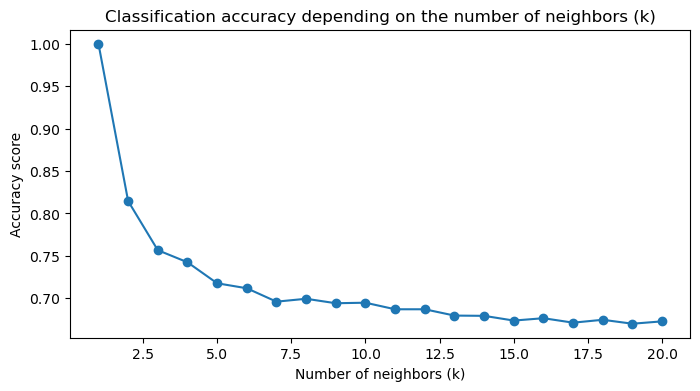

In [11]:
find_n_neighbors(knn, X_train, y_train, 21)

In [26]:
knn.set_params(n_neighbors=3)

KNeighborsClassifier(n_neighbors=3)

 CV Scores: [0.67326733 0.65470297 0.67286245 0.65427509]
 CV Mean score: 0.6637769608745261


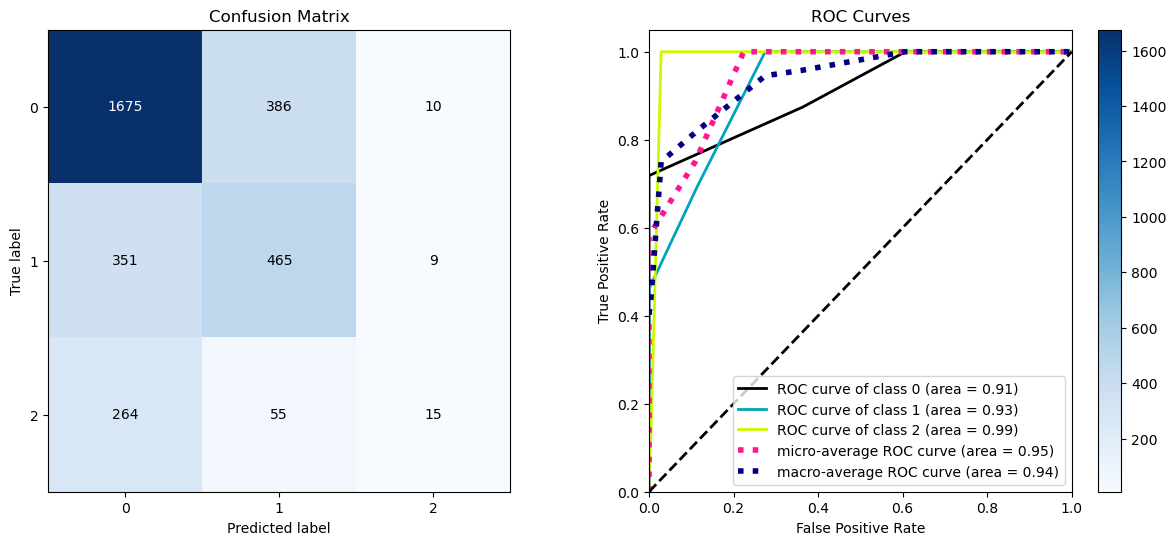

In [27]:
test_model(knn, X_train, y_train)

In [28]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
knn_pred = knn.predict(X_test)

In [30]:
f1_score(knn_pred, y_test, average='weighted')

0.6975195095458914

In [31]:
accuracy_score(knn_pred, y_test)

0.6720297029702971

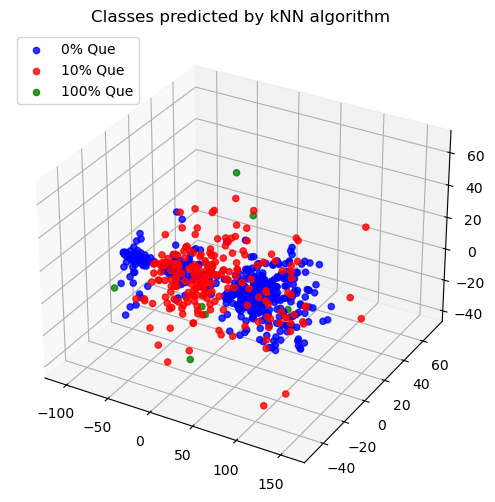

In [32]:
draw_classes_scatterplot(X_test, knn_pred, "Classes predicted by kNN algorithm", 
                         ["0% Que", "10% Que", "100% Que"], ["blue", "red", "green"])

## Nearest Centroid

In [19]:
nc = NearestCentroid()

 CV Scores: [0.46658416 0.51980198 0.4795539  0.48946716]
 CV Mean score: 0.48885180107230053
This classifier has no attribute 'predict_proba' 


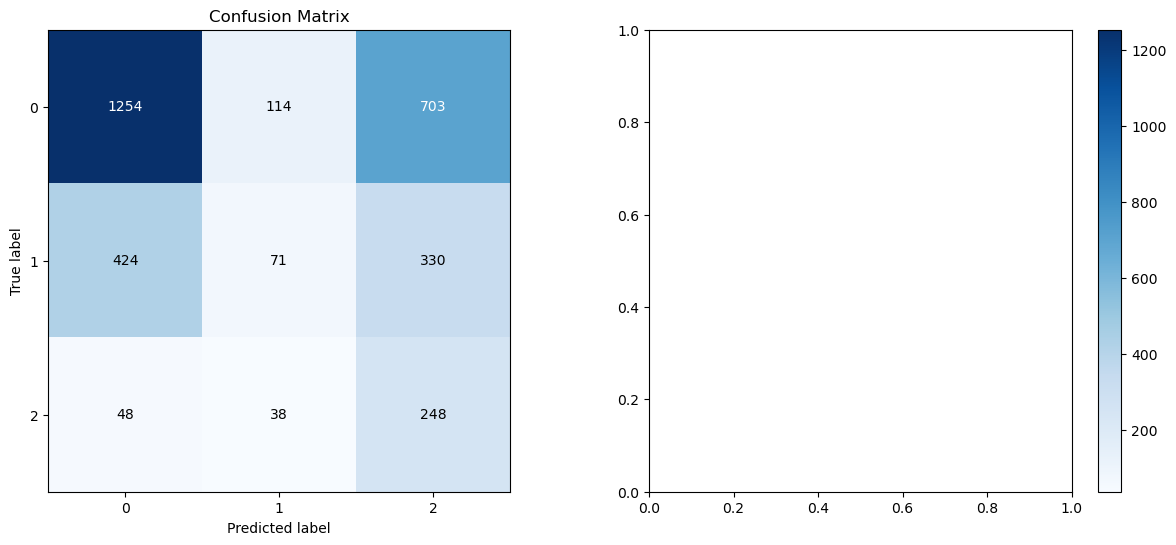

In [20]:
test_model(nc, X_train, y_train)

In [21]:
nc.fit(X_train, y_train)

NearestCentroid()

In [22]:
nc_pred = nc.predict(X_test)

In [23]:
f1_score(nc_pred, y_test, average='weighted')

0.49419518505050963

In [24]:
accuracy_score(nc_pred, y_test)

0.504950495049505

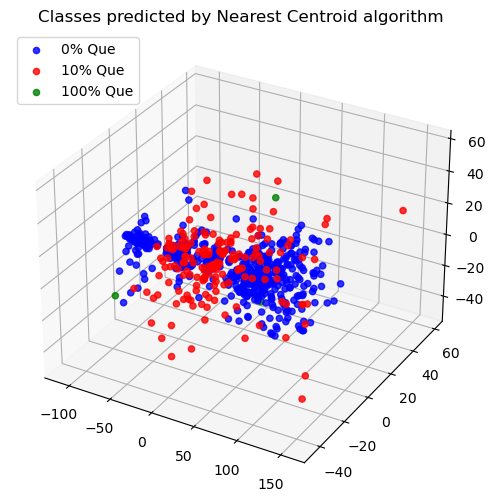

In [25]:
draw_classes_scatterplot(X_test, knn_pred, "Classes predicted by Nearest Centroid algorithm", 
                        ["0% Que", "10% Que", "100% Que"], ["blue", "red", "green"])